In [1]:
import warnings# Suppressing Warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,No
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,Yes
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,No
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,Yes
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,Yes


In [3]:
df.shape

(233154, 41)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [5]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [6]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [7]:
df['Employment.Type'].mode()

0    Self employed
dtype: object

In [8]:
df['Employment.Type'].fillna('Self employed', inplace=True)

In [9]:
df['Employment.Type'].value_counts()

Self employed    135296
Salaried          97858
Name: Employment.Type, dtype: int64

In [10]:
df.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [11]:
df.drop(['CREDIT.HISTORY.LENGTH','AVERAGE.ACCT.AGE','Date.of.Birth','DisbursalDate'], axis=1 , inplace=True)

In [12]:
df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,0,0,0,0,0,0,0,0,0,No
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,...,0,0,0,0,1991,0,0,1,0,Yes
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,...,0,0,0,0,0,0,0,0,0,No
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,...,0,0,0,0,31,0,0,0,1,Yes
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,...,0,0,0,0,0,0,0,0,1,Yes
5,518279,54513,61900,89.66,67,22807,45,1501,Self employed,6,...,0,0,0,0,1347,0,0,0,0,No
6,529269,46349,61500,76.42,67,22807,45,1502,Salaried,6,...,0,0,0,0,0,0,0,0,0,No
7,510278,43894,61900,71.89,67,22807,45,1501,Salaried,6,...,0,0,0,0,0,0,0,0,0,No
8,490213,53713,61973,89.56,67,22807,45,1497,Self employed,6,...,0,0,0,0,0,0,0,0,1,No
9,510980,52603,61300,86.95,67,22807,45,1492,Salaried,6,...,0,0,0,0,2608,0,0,0,0,No


# EDA

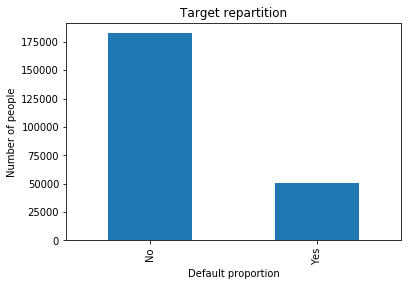

In [13]:
fig11=plt.figure()
ax11=plt.axes()
the_target = df['loan_default']
plt.title('Target repartition')
ax11 = ax11.set(xlabel='Default proportion', ylabel='Number of people')
the_target.value_counts().plot.bar()
plt.show()

In [14]:
# List of variables to map
l1=['loan_default']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[l1] = df[l1].apply(binary_map)
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,0,0,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,...,0,0,0,0,1991,0,0,1,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,...,0,0,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,...,0,0,0,0,31,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,...,0,0,0,0,0,0,0,0,1,1


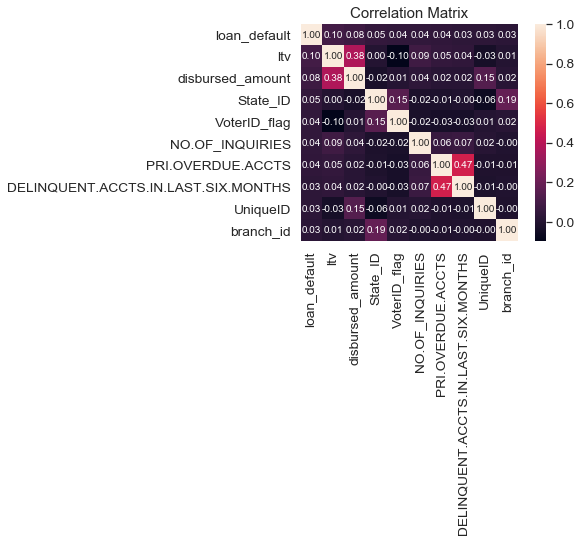

In [15]:
corr_mat = df.corr()

fig2=plt.figure()
sns.set(rc={'figure.figsize':(20,15)})
k = 10
cols = corr_mat.nlargest(k, 'loan_default')['loan_default'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Matrix')
plt.show()

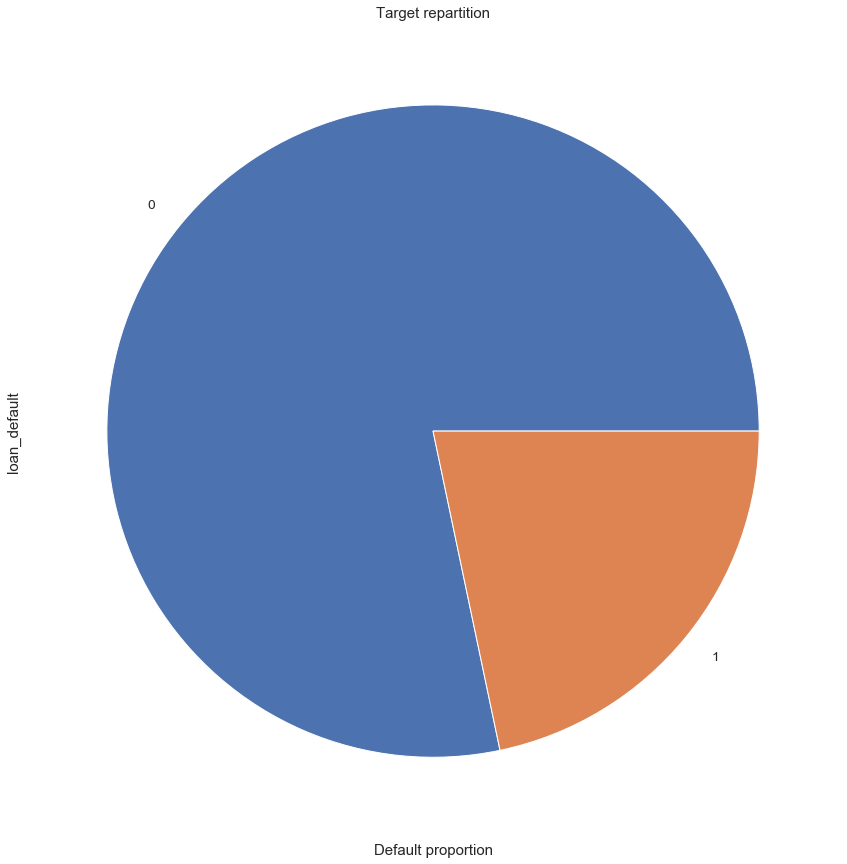

In [16]:
fig7=plt.figure()
ax7=plt.axes()
the_target = df['loan_default']
plt.title('Target repartition')
ax7 = ax7.set(xlabel='Default proportion')
the_target.value_counts().plot.pie()
plt.show()

In [17]:
X=pd.get_dummies(df[['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION']],drop_first=True)

In [18]:
df = pd.concat([df,X],axis=1)

In [19]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,6,...,0,0,0,1,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,6,...,0,0,0,0,0,0,0,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,6,...,0,0,0,1,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,6,...,0,1,0,0,0,0,0,0,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,6,...,0,0,0,1,0,0,0,0,0,0


In [20]:
df.drop(['Employment.Type','PERFORM_CNS.SCORE.DESCRIPTION'],axis=1,inplace=True)

In [21]:
df.shape

(233154, 55)

In [22]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
0,420825,50578,58400,89.55,67,22807,45,1441,6,1998,...,0,0,0,1,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,6,1998,...,0,0,0,0,0,0,0,0,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,6,1998,...,0,0,0,1,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,6,1998,...,0,1,0,0,0,0,0,0,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,6,1998,...,0,0,0,1,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(['loan_default','UniqueID'], axis=1)
X.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
0,50578,58400,89.55,67,22807,45,1441,6,1998,1,...,0,0,0,1,0,0,0,0,0,0
1,47145,65550,73.23,67,22807,45,1502,6,1998,1,...,0,0,0,0,0,0,0,0,0,0
2,53278,61360,89.63,67,22807,45,1497,6,1998,1,...,0,0,0,1,0,0,0,0,0,0
3,57513,66113,88.48,67,22807,45,1501,6,1998,1,...,0,1,0,0,0,0,0,0,0,0
4,52378,60300,88.39,67,22807,45,1495,6,1998,1,...,0,0,0,1,0,0,0,0,0,0


In [25]:
y = df['loan_default']

y.head()

0    0
1    1
2    0
3    1
4    1
Name: loan_default, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X.describe()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
count,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,...,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,...,0.035500,0.004864,0.037640,0.501600,0.000013,0.012374,0.006579,0.015749,0.004186,0.016148
std,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,...,0.185041,0.069571,0.190325,0.499999,0.003587,0.110547,0.080846,0.124504,0.064564,0.126045
min,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
scaler = StandardScaler()

X_train[['disbursed_amount','asset_cost','ltv','branch_id','supplier_id','manufacturer_id','Current_pincode_ID']] = scaler.fit_transform(X_train[['disbursed_amount','asset_cost','ltv','branch_id','supplier_id','manufacturer_id','Current_pincode_ID']])

X_train.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
146022,-0.882674,-1.170007,0.723218,-0.069068,-0.453338,0.765244,-1.131190,6,863,1,...,0,0,0,1,0,0,0,0,0,0
142057,1.035096,1.045887,-0.150844,1.233525,1.068575,-0.904634,1.700402,7,1105,1,...,0,0,0,1,0,0,0,0,0,0
186381,0.804853,0.751637,-0.044102,0.403301,-0.264245,-0.814370,-1.209472,15,2509,1,...,0,0,0,0,0,0,0,0,0,0
42508,0.640997,0.203630,0.455487,1.319411,0.407609,0.765244,1.387720,5,1466,1,...,0,0,0,0,0,0,0,0,0,0
63350,1.283835,1.103006,-0.041477,-0.756150,1.233029,-0.904634,1.274098,5,1482,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
import statsmodels.api as sm

In [31]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:               163207
Model:                            GLM   Df Residuals:                   163154
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -82345.
Date:                Sun, 31 May 2020   Deviance:                   1.6469e+05
Time:                        03:11:34   Pearson chi2:                 1.85e+05
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
disbursed_amount                                                                          0.0014      0.036      0.037      0.970      -0.070       0.073
asset_cost                                                                                0.1040      0.036      2.889      0.004       0.033       0.175
ltv                                                                                       0.3635      0.025     14.349      0.000       0.314       0.413
branch_id                                                                                 0.0334      0.006      5.324      0.000       0.021       0.046
supplier_id                                                                               0.0220      0.007      3.369      0.001       0.009       0.035
manufacturer_id                                                                          -0.0732      0.006    -11.526      0.000      -0.086      -0.061
Current_pincode_ID                                                                        0.0785      0.007     11.019      0.000       0.065       0.092
State_ID                                                                                  0.0220      0.001     15.569      0.000       0.019       0.025
Employee_code_ID                                                                       3.448e-05   6.37e-06      5.413      0.000     2.2e-05     4.7e-05
MobileNo_Avl_Flag                                                                         1.1625      0.488      2.384      0.017       0.207       2.118
Aadhar_flag                                                                              -0.1906      0.048     -3.956      0.000      -0.285      -0.096
PAN_flag                                                                                 -0.0774      0.024     -3.231      0.001      -0.124      -0.030
VoterID_flag                                                                              0.0344      0.047      0.733      0.464      -0.058       0.126
Driving_flag                                                                             -0.1869      0.057     -3.275      0.001      -0.299      -0.075
Passport_flag                                                                            -0.5193      0.161     -3.220      0.001      -0.835      -0.203
PERFORM_CNS.SCORE                                                                        -0.0035      0.001     -5.910      0.000      -0.005      -0.002
PRI.NO.OF.ACCTS                                                                          -0.0152      0.002     -6.405      0.000      -0.020      -0.011
PRI

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [33]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [34]:
rfe.support_

array([False,  True,  True,  True, False,  True, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False])

In [35]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('disbursed_amount', False, 10),
 ('asset_cost', True, 1),
 ('ltv', True, 1),
 ('branch_id', True, 1),
 ('supplier_id', False, 5),
 ('manufacturer_id', True, 1),
 ('Current_pincode_ID', False, 29),
 ('State_ID', False, 7),
 ('Employee_code_ID', False, 12),
 ('MobileNo_Avl_Flag', True, 1),
 ('Aadhar_flag', True, 1),
 ('PAN_flag', False, 4),
 ('VoterID_flag', True, 1),
 ('Driving_flag', True, 1),
 ('Passport_flag', False, 37),
 ('PERFORM_CNS.SCORE', False, 11),
 ('PRI.NO.OF.ACCTS', False, 9),
 ('PRI.ACTIVE.ACCTS', False, 3),
 ('PRI.OVERDUE.ACCTS', False, 24),
 ('PRI.CURRENT.BALANCE', False, 19),
 ('PRI.SANCTIONED.AMOUNT', False, 16),
 ('PRI.DISBURSED.AMOUNT', False, 26),
 ('SEC.NO.OF.ACCTS', False, 6),
 ('SEC.ACTIVE.ACCTS', False, 18),
 ('SEC.OVERDUE.ACCTS', False, 34),
 ('SEC.CURRENT.BALANCE', False, 21),
 ('SEC.SANCTIONED.AMOUNT', False, 13),
 ('SEC.DISBURSED.AMOUNT', False, 14),
 ('PRIMARY.INSTAL.AMT', False, 20),
 ('SEC.INSTAL.AMT', False, 15),
 ('NEW.ACCTS.IN.LAST.SIX.MONTHS', Fals

In [36]:
col = X_train.columns[rfe.support_]

In [37]:
X_train.columns[~rfe.support_]

Index(['disbursed_amount', 'supplier_id', 'Current_pincode_ID', 'State_ID',
       'Employee_code_ID', 'PAN_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES',
       'PERFORM_CNS.SCORE.DESCRIPTION_E-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_G-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_H-Medium Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_I-Medium Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_J-High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_M-

In [38]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:               163207
Model:                            GLM   Df Residuals:                   163192
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83467.
Date:                Sun, 31 May 2020   Deviance:                   1.6693e+05
Time:                        03:21:35   Pearson chi2:                 1.65e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
asset_cost                                                                                0.1161      0.007     17.590      0.000       0.103       0.129
ltv                                                                                       0.3500      0.007     47.405      0.000       0.336       0.365
branch_id                                                                                 0.0610      0.006     10.261      0.000       0.049       0.073
manufacturer_id                                                                          -0.0821      0.006    -13.180      0.000      -0.094      -0.070
MobileNo_Avl_Flag                                                                        -1.1389      0.045    -25.264      0.000      -1.227      -1.051
Aadhar_flag                                                                              -0.2302      0.044     -5.215      0.000      -0.317      -0.144
VoterID_flag                                                                              0.0923      0.044      2.099      0.036       0.006       0.178
Driving_flag                                                                             -0.1874      0.055     -3.433      0.001      -0.294      -0.080
Employment.Type_Self employed                                                             0.1579      0.013     12.594      0.000       0.133       0.182
PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk                                            -0.6587      0.038    -17.495      0.000      -0.732      -0.585
PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk                                            -0.3771      0.026    -14.501      0.000      -0.428      -0.326
PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk                                            -0.5483      0.033    -16.853      0.000      -0.612      -0.485
PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk                                                 -0.3055      0.034     -8.923      0.000      -0.373      -0.238
PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)    -0.2526      0.057     -4.409      0.000      -0.365      -0.140
PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer      -0.1665      0.050     -3.348      0.001      -0.264      -0.069
=========================================================================================================================================================
"""

In [39]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

146022    0.238501
142057    0.270303
186381    0.147528
42508     0.237155
63350     0.226637
103772    0.255001
17094     0.173846
124376    0.276072
75405     0.113205
108767    0.233981
dtype: float64

In [40]:
y_train_pred[:10]


146022    0.238501
142057    0.270303
186381    0.147528
42508     0.237155
63350     0.226637
103772    0.255001
17094     0.173846
124376    0.276072
75405     0.113205
108767    0.233981
dtype: float64

In [41]:
y_train_pred_final = pd.DataFrame({'loan_default':y_train.values, 'loan_default_Prob':y_train_pred})
y_train_pred_final['UniqueID'] = y_train.index
y_train_pred_final.head()

,loan_default,loan_default_Prob,UniqueID
146022,1,0.238501,146022
142057,0,0.270303,142057
186381,0,0.147528,186381
42508,0,0.237155,42508
63350,0,0.226637,63350


In [42]:
y_train_pred_final['predicted'] = y_train_pred_final.loan_default_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,loan_default,loan_default_Prob,UniqueID,predicted
146022,1,0.238501,146022,0
142057,0,0.270303,142057,0
186381,0,0.147528,186381,0
42508,0,0.237155,42508,0
63350,0,0.226637,63350,0


In [43]:
from sklearn import metrics

In [44]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.loan_default, y_train_pred_final.predicted )
print(confusion)

[[127752      5]
 [ 35450      0]]


In [45]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,MobileNo_Avl_Flag,55.93
5,Aadhar_flag,7.19
6,VoterID_flag,6.61
7,Driving_flag,1.75
1,ltv,1.13
0,asset_cost,1.11
3,manufacturer_id,1.02
8,Employment.Type_Self employed,1.02
10,PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk,1.02
2,branch_id,1.01


In [47]:
col = col.drop('MobileNo_Avl_Flag')
col

Index(['asset_cost', 'ltv', 'branch_id', 'manufacturer_id', 'Aadhar_flag',
       'VoterID_flag', 'Driving_flag', 'Employment.Type_Self employed',
       'PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer'],
      dtype='object')

In [48]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:               163207
Model:                            GLM   Df Residuals:                   163192
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83467.
Date:                Sun, 31 May 2020   Deviance:                   1.6693e+05
Time:                        03:21:44   Pearson chi2:                 1.65e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    -1.1389      0.045    -25.264      0.000      -1.227      -1.051
asset_cost                                                                                0.1161      0.007     17.590      0.000       0.103       0.129
ltv                                                                                       0.3500      0.007     47.405      0.000       0.336       0.365
branch_id                                                                                 0.0610      0.006     10.261      0.000       0.049       0.073
manufacturer_id                                                                          -0.0821      0.006    -13.180      0.000      -0.094      -0.070
Aadhar_flag                                                                              -0.2302      0.044     -5.215      0.000      -0.317      -0.144
VoterID_flag                                                                              0.0923      0.044      2.099      0.036       0.006       0.178
Driving_flag                                                                             -0.1874      0.055     -3.433      0.001      -0.294      -0.080
Employment.Type_Self employed                                                             0.1579      0.013     12.594      0.000       0.133       0.182
PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk                                            -0.6587      0.038    -17.495      0.000      -0.732      -0.585
PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk                                            -0.3771      0.026    -14.501      0.000      -0.428      -0.326
PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk                                            -0.5483      0.033    -16.853      0.000      -0.612      -0.485
PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk                                                 -0.3055      0.034     -8.923      0.000      -0.373      -0.238
PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)    -0.2526      0.057     -4.409      0.000      -0.365      -0.140
PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer      -0.1665      0.050     -3.348      0.001      -0.264      -0.069
=========================================================================================================================================================
"""

In [49]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [50]:
y_train_pred[:10]

array([0.23850096, 0.27030298, 0.14752766, 0.23715461, 0.22663653,
       0.25500064, 0.17384631, 0.27607221, 0.11320522, 0.23398122])

In [51]:
y_train_pred_final['loan_default_Prob'] = y_train_pred

In [52]:
y_train_pred_final['predicted'] = y_train_pred_final.loan_default_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,loan_default,loan_default_Prob,UniqueID,predicted
146022,1,0.238501,146022,0
142057,0,0.270303,142057,0
186381,0,0.147528,186381,0
42508,0,0.237155,42508,0
63350,0,0.226637,63350,0


In [53]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.loan_default, y_train_pred_final.predicted))

0.7827605433590471


In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Employment.Type_Self employed,2.36
4,Aadhar_flag,2.34
5,VoterID_flag,1.27
1,ltv,1.13
0,asset_cost,1.11
9,PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk,1.09
10,PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk,1.06
8,PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk,1.05
11,PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk,1.05
6,Driving_flag,1.03


In [55]:
col = col.drop('Aadhar_flag')
col

Index(['asset_cost', 'ltv', 'branch_id', 'manufacturer_id', 'VoterID_flag',
       'Driving_flag', 'Employment.Type_Self employed',
       'PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)',
       'PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer'],
      dtype='object')

In [56]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           loan_default   No. Observations:               163207
Model:                            GLM   Df Residuals:                   163193
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83481.
Date:                Sun, 31 May 2020   Deviance:                   1.6696e+05
Time:                        03:21:53   Pearson chi2:                 1.66e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================================
                                                                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    -1.3675      0.011   -129.347      0.000      -1.388      -1.347
asset_cost                                                                                0.1168      0.007     17.718      0.000       0.104       0.130
ltv                                                                                       0.3489      0.007     47.291      0.000       0.334       0.363
branch_id                                                                                 0.0628      0.006     10.590      0.000       0.051       0.074
manufacturer_id                                                                          -0.0820      0.006    -13.161      0.000      -0.094      -0.070
VoterID_flag                                                                              0.3038      0.017     18.274      0.000       0.271       0.336
Driving_flag                                                                             -0.0050      0.042     -0.120      0.904      -0.086       0.076
Employment.Type_Self employed                                                             0.1590      0.013     12.689      0.000       0.134       0.184
PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk                                            -0.6597      0.038    -17.523      0.000      -0.733      -0.586
PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk                                            -0.3782      0.026    -14.544      0.000      -0.429      -0.327
PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk                                            -0.5492      0.033    -16.881      0.000      -0.613      -0.485
PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk                                                 -0.3057      0.034     -8.930      0.000      -0.373      -0.239
PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)    -0.2537      0.057     -4.427      0.000      -0.366      -0.141
PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer      -0.1671      0.050     -3.361      0.001      -0.265      -0.070
=========================================================================================================================================================
"""

In [57]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [58]:
y_train_pred[:10]

array([0.23868142, 0.2714524 , 0.14776626, 0.23783016, 0.22679374,
       0.25553441, 0.17429743, 0.27729498, 0.11336205, 0.23512321])

In [59]:
y_train_pred_final['loan_default_Prob'] = y_train_pred

In [60]:
y_train_pred_final['predicted'] = y_train_pred_final.loan_default_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,loan_default,loan_default_Prob,UniqueID,predicted
146022,1,0.238681,146022,0
142057,0,0.271452,142057,0
186381,0,0.147766,186381,0
42508,0,0.237830,42508,0
63350,0,0.226794,63350,0


In [61]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.loan_default, y_train_pred_final.predicted))

0.7827605433590471


In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Employment.Type_Self employed,1.26
4,VoterID_flag,1.14
1,ltv,1.13
0,asset_cost,1.10
8,PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk,1.04
9,PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk,1.03
10,PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk,1.03
3,manufacturer_id,1.02
5,Driving_flag,1.02
7,PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk,1.02


In [63]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.loan_default, y_train_pred_final.predicted )
confusion

array([[127752,      5],
       [ 35450,      0]], dtype=int64)

In [64]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.loan_default, y_train_pred_final.predicted)

0.7827605433590471

In [65]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [66]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0

In [67]:
# Let us calculate specificity
TN / float(TN+FP)

0.9999608632012336

In [68]:
# Calculate false postive rate 

print(FP/ float(TN+FP))

3.9136798766408105e-05


In [69]:
# positive predictive value 
print (TP / float(TP+FP))

0.0


In [70]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
thresholds = metrics.roc_curve( y_train_pred_final.loan_default, y_train_pred_final.loan_default_Prob, drop_intermediate = False )

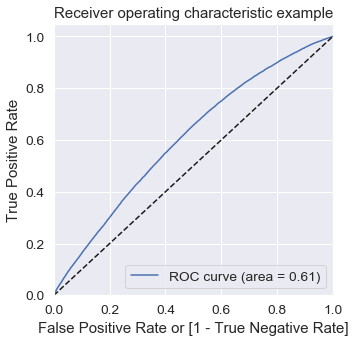

In [72]:
draw_roc(y_train_pred_final.loan_default, y_train_pred_final.loan_default_Prob)

In [73]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.loan_default_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,loan_default,loan_default_Prob,UniqueID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
146022,1,0.238681,146022,0,1,1,1,0,0,0,0,0,0,0
142057,0,0.271452,142057,0,1,1,1,0,0,0,0,0,0,0
186381,0,0.147766,186381,0,1,1,0,0,0,0,0,0,0,0
42508,0,0.237830,42508,0,1,1,1,0,0,0,0,0,0,0
63350,0,0.226794,63350,0,1,1,1,0,0,0,0,0,0,0


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.loan_default, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.217209  1.000000  0.000000
0.1   0.1  0.244536  0.985078  0.039051
0.2   0.2  0.482130  0.743047  0.409731
0.3   0.3  0.753283  0.120874  0.928763
0.4   0.4  0.782546  0.003131  0.998818
0.5   0.5  0.782761  0.000000  0.999961
0.6   0.6  0.782779  0.000000  0.999984
0.7   0.7  0.782779  0.000000  0.999984
0.8   0.8  0.782779  0.000000  0.999984
0.9   0.9  0.782779  0.000000  0.999984


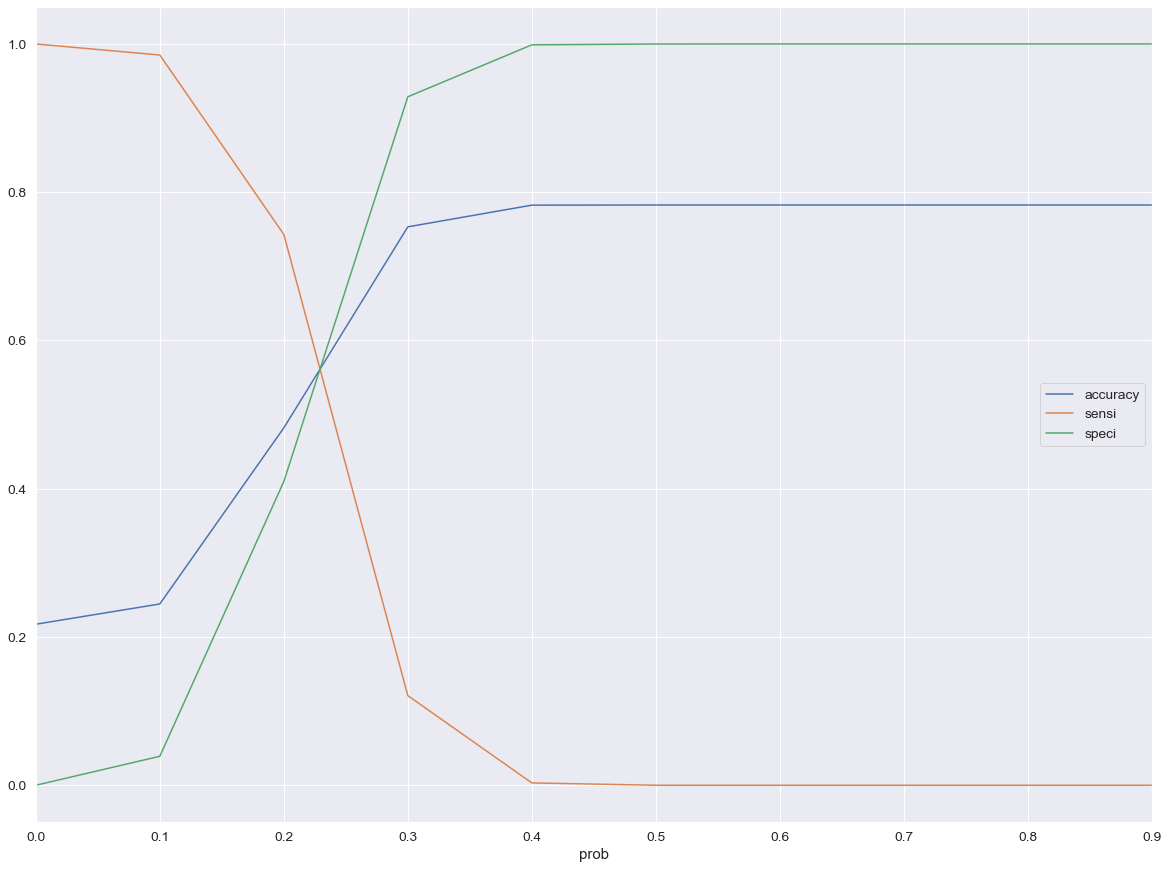

In [75]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.loan_default_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,loan_default,loan_default_Prob,UniqueID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
146022,1,0.238681,146022,0,1,1,1,0,0,0,0,0,0,0,0
142057,0,0.271452,142057,0,1,1,1,0,0,0,0,0,0,0,0
186381,0,0.147766,186381,0,1,1,0,0,0,0,0,0,0,0,0
42508,0,0.237830,42508,0,1,1,1,0,0,0,0,0,0,0,0
63350,0,0.226794,63350,0,1,1,1,0,0,0,0,0,0,0,0


In [77]:
metrics.accuracy_score(y_train_pred_final.loan_default, y_train_pred_final.final_predicted)

0.7532826410631897

In [78]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.loan_default, y_train_pred_final.final_predicted )
confusion2

array([[118656,   9101],
       [ 31165,   4285]], dtype=int64)

In [79]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] 

In [80]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.12087447108603668

In [81]:
# Let us calculate specificity
TN / float(TN+FP)

0.928763198885384

In [82]:
print(FP/ float(TN+FP))

0.07123680111461603


In [83]:
# positive predictive value 
print(TP / float(TP+FP))

0.3201105632750635


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7919851022219849


In [85]:
confusion = metrics.confusion_matrix(y_train_pred_final.loan_default, y_train_pred_final.predicted )
confusion

array([[127752,      5],
       [ 35450,      0]], dtype=int64)

In [86]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.0

In [87]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.0

In [88]:
from sklearn.metrics import precision_score, recall_score

In [89]:
?precision_score

In [90]:
precision_score(y_train_pred_final.loan_default, y_train_pred_final.predicted)

0.0

In [91]:
recall_score(y_train_pred_final.loan_default, y_train_pred_final.predicted)

0.0

In [92]:
from sklearn.metrics import precision_recall_curve

In [93]:
y_train_pred_final.loan_default, y_train_pred_final.predicted

(146022    1
 142057    0
 186381    0
 42508     0
 63350     0
 103772    1
 17094     0
 124376    0
 75405     0
 108767    0
 41902     0
 197803    0
 154866    0
 199871    0
 206578    0
 133883    0
 223502    1
 101015    0
 138084    0
 130295    0
 121022    1
 1308      0
 122957    0
 114197    0
 70714     1
 224332    0
 43671     0
 162241    0
 184125    1
 111310    0
          ..
 202395    0
 215426    0
 137302    1
 80989     1
 169609    0
 173563    0
 109456    0
 138810    1
 148796    1
 190315    0
 109796    0
 91791     1
 86296     0
 109296    0
 209905    0
 181026    0
 202254    0
 106210    0
 144962    0
 20533     0
 206690    0
 145332    1
 82270     0
 194442    0
 212912    1
 65615     0
 77655     0
 210755    0
 56088     0
 38408     1
 Name: loan_default, Length: 163207, dtype: int64, 146022    0
 142057    0
 186381    0
 42508     0
 63350     0
 103772    0
 17094     0
 124376    0
 75405     0
 108767    0
 41902     0
 197803    0
 

In [94]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.loan_default, y_train_pred_final.loan_default_Prob)

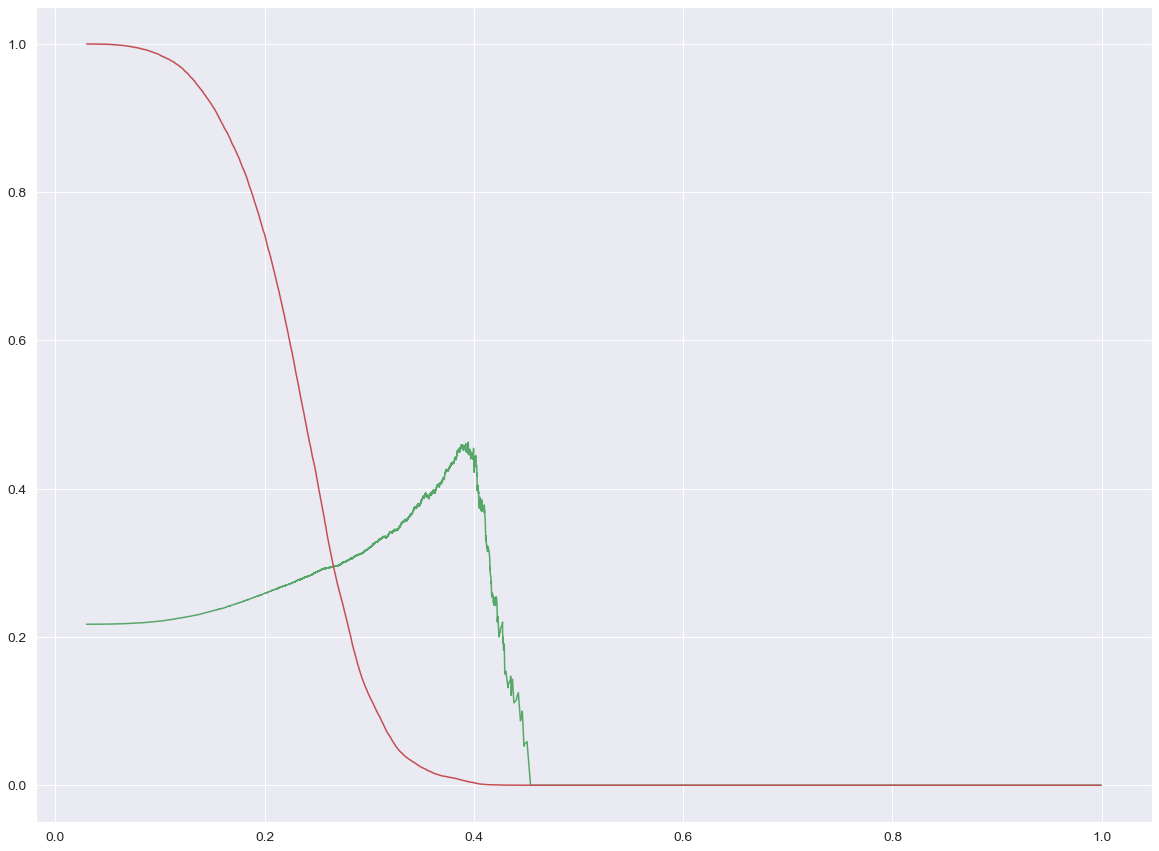

In [95]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [96]:
X_test[['disbursed_amount','asset_cost','ltv','branch_id','supplier_id','manufacturer_id','Current_pincode_ID']] = scaler.transform(X_test[['disbursed_amount','asset_cost','ltv','branch_id','supplier_id','manufacturer_id','Current_pincode_ID']])

In [97]:
X_test = X_test[col]
X_test.head()

,asset_cost,ltv,branch_id,manufacturer_id,VoterID_flag,Driving_flag,Employment.Type_Self employed,PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer
22436,-0.141602,1.228057,-0.040440,0.765244,0,0,0,0,0,1,0,0,0
58474,0.540103,-0.450947,-0.083382,0.765244,0,0,0,0,0,0,0,0,0
93668,-0.349989,-2.306689,2.550433,-1.085161,1,0,1,0,0,0,0,0,0
42565,-0.598187,0.513233,1.319411,0.765244,0,0,0,0,0,0,0,0,0
79824,1.314331,-2.640915,1.133326,-0.814370,0,0,1,0,0,0,0,0,0


In [98]:
X_test_sm = sm.add_constant(X_test)

In [99]:
y_test_pred = res.predict(X_test_sm)

In [100]:
y_test_pred[:10]

22436     0.172207
58474     0.178034
93668     0.182238
42565     0.224758
79824     0.137238
17291     0.211553
85100     0.169429
58067     0.249473
187782    0.310399
12875     0.134505
dtype: float64

In [101]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [102]:
# Let's see the head
y_pred_1.head()

,0
22436,0.172207
58474,0.178034
93668,0.182238
42565,0.224758
79824,0.137238


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [104]:
# Putting Lead Number to index
y_test_df['UniqueID'] = y_test_df.index

In [105]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [107]:
y_pred_final.head()

,loan_default,UniqueID,0
0,0,22436,0.172207
1,0,58474,0.178034
2,0,93668,0.182238
3,0,42565,0.224758
4,0,79824,0.137238


In [108]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'loan_default_Prob'})

In [109]:
# Let's see the head of y_pred_final
y_pred_final.head()

,loan_default,UniqueID,loan_default_Prob
0,0,22436,0.172207
1,0,58474,0.178034
2,0,93668,0.182238
3,0,42565,0.224758
4,0,79824,0.137238


In [110]:
y_pred_final['final_predicted'] = y_pred_final.loan_default_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [111]:
y_pred_final.head()

,loan_default,UniqueID,loan_default_Prob,final_predicted
0,0,22436,0.172207,0
1,0,58474,0.178034,0
2,0,93668,0.182238,0
3,0,42565,0.224758,0
4,0,79824,0.137238,0


In [112]:
metrics.accuracy_score(y_pred_final.loan_default, y_pred_final.final_predicted)

0.7831072097445209

In [113]:
confusion2 = metrics.confusion_matrix(y_pred_final.loan_default, y_pred_final.final_predicted )
cmatrix = pd.DataFrame(confusion2, columns=['Not default', 'default'], index=['Non default','default'])
cmatrix

,Not default,default
Non default,54721,65
default,15106,55


In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.003627729041619946

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.9988135655094367

# KNN

In [117]:
X_train.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
146022,-0.882674,-1.170007,0.723218,-0.069068,-0.453338,0.765244,-1.131190,6,863,1,...,0,0,0,1,0,0,0,0,0,0
142057,1.035096,1.045887,-0.150844,1.233525,1.068575,-0.904634,1.700402,7,1105,1,...,0,0,0,1,0,0,0,0,0,0
186381,0.804853,0.751637,-0.044102,0.403301,-0.264245,-0.814370,-1.209472,15,2509,1,...,0,0,0,0,0,0,0,0,0,0
42508,0.640997,0.203630,0.455487,1.319411,0.407609,0.765244,1.387720,5,1466,1,...,0,0,0,0,0,0,0,0,0,0
63350,1.283835,1.103006,-0.041477,-0.756150,1.233029,-0.904634,1.274098,5,1482,1,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_train.describe()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,...,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
count,1.632070e+05,1.632070e+05,1.632070e+05,1.632070e+05,1.632070e+05,1.632070e+05,1.632070e+05,163207.000000,163207.000000,163207.0,...,163207.000000,163207.000000,163207.000000,163207.000000,163207.000000,163207.000000,163207.000000,163207.000000,163207.000000,163207.000000
mean,2.757636e-16,2.196644e-16,-7.489191e-16,3.027939e-16,4.858909e-16,-1.674217e-15,7.135734e-17,7.255963,1548.995319,1.0,...,0.035734,0.004951,0.037688,0.501124,0.000018,0.012573,0.006623,0.015802,0.004142,0.016219
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,4.484060,976.343778,0.0,...,0.185626,0.070188,0.190442,0.500000,0.004287,0.111423,0.081115,0.124709,0.064225,0.126316
min,-3.130919e+00,-2.040693e+00,-5.662947e+00,-1.028120e+00,-2.612151e+00,-1.085161e+00,-1.517235e+00,1.000000,1.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.564194e-01,-5.331218e-01,-5.139429e-01,-8.420354e-01,-8.842412e-01,-9.497657e-01,-8.417681e-01,4.000000,708.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.543369e-02,-2.578331e-01,1.781323e-01,-1.692674e-01,1.981736e-01,7.652442e-01,-1.913518e-01,6.000000,1449.000000,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.644776e-01,1.776669e-01,7.792140e-01,8.184133e-01,9.622817e-01,7.652442e-01,1.017331e+00,10.000000,2364.000000,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.184937e+01,8.146076e+01,1.771393e+00,2.693575e+00,1.478850e+00,3.924473e+00,1.767949e+00,22.000000,3795.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
